<a href="https://colab.research.google.com/github/Pianomello/Summer-camp-2024/blob/main/Asteroid_Hazard_Prediction.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

<h1><b> Machine Learning in Astronomy : Asteroid Hazardousness

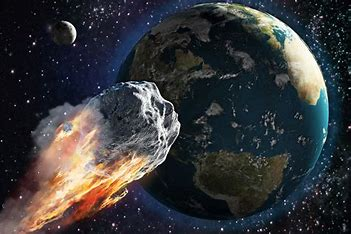

<h2> Step 1: Setup

<h3><u> Importing useful libraries

In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

<h3><u> Loading data

In [ ]:
data = pd.read_csv('Asteroid-Data.csv')
data.head(10)
#data.sample(10)
#data.tail(10)

,Object Name,Epoch (TDB),Orbit Axis (AU),Orbit Eccentricity,Orbit Inclination (deg),Perihelion Argument (deg),Node Longitude (deg),Mean Anomoly (deg),Perihelion Distance (AU),Aphelion Distance (AU),Orbital Period (yr),Minimum Orbit Intersection Distance (AU),Orbital Reference,Asteroid Magnitude,Classification,Hazardous
0,433 Eros,57800,1.4579,0.2226,10.8277,178.8050,304.3265,319.3111,1.1335,1.78,1.76,0.1492,598,11.16,Amor Asteroid,False
1,719 Albert,57800,2.6385,0.5479,11.5822,156.1409,183.9204,224.5535,1.1928,4.08,4.29,0.2004,78,15.50,Amor Asteroid,False
2,887 Alinda,57800,2.4787,0.5671,9.3561,350.3482,110.5444,351.3730,1.0731,3.88,3.90,0.0925,188,13.40,Amor Asteroid,False
3,1036 Ganymed,57800,2.6628,0.5338,26.6929,132.4690,215.5551,92.5640,1.2413,4.08,4.35,0.3421,597,9.45,Amor Asteroid,False
4,1221 Amor,57800,1.9191,0.4356,11.8795,26.6572,171.3448,313.7379,1.0832,2.76,2.66,0.1068,70,17.70,Amor Asteroid,False
5,1566 Icarus,57800,1.0781,0.8269,22.8255,31.3830,88.0107,215.5288,0.1867,1.97,1.12,0.0345,100,16.90,Apollo Asteroid,True
6,1580 Betulia,57800,2.1973,0.4875,52.0908,159.4852,62.2921,191.9105,1.1260,3.27,3.26,0.1361,191,14.80,Amor Asteroid,False
7,1620 Geographos,57800,1.2453,0.3353,13.3375,276.8930,337.2080,104.1556,0.8277,1.66,1.39,0.0307,449,15.60,Apollo Asteroid,True
8,1627 Ivar,57800,1.8628,0.3966,8.4512,167.7730,133.1445,151.4603,1.1241,2.60,2.54,0.1124,635,13.20,Amor Asteroid,False
9,1685 Toro,54520,1.3673,0.4359,9.3807,127.0826,274.3396,48.6229,0.7713,1.96,1.60,0.0504,355,14.23,Apollo Asteroid,False


<h2> Step 2: Data Analysis and Cleaning


| **Feature**                              | **Description**                                                                                                                                                                                                                      |
|------------------------------------------|--------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------|
| **Object Name**                          | The name or designation of the asteroid.                                                                                                                                                                                             |
| **Epoch (TDB)**                          | The specific date and time for which the orbital elements are calculated, given in Barycentric Dynamical Time (TDB).                                                                                                                 |
| **Orbit Axis (AU)**                      | The semi-major axis of the asteroid's orbit, measured in astronomical units (AU). This is the average distance between the asteroid and the Sun over one complete orbit.                                                              |
| **Orbit Eccentricity**                   | A measure of the deviation of the orbit from a perfect circle. An eccentricity of 0 indicates a circular orbit, while values closer to 1 indicate more elongated orbits.                                                              |
| **Orbit Inclination (deg)**              | The tilt of the asteroid's orbit relative to the plane of the solar system, measured in degrees.                                                                                                                                      |
| **Perihelion Argument (deg)**            | The angle from the ascending node to the perihelion, measured in the plane of the asteroid's orbit, in degrees. This indicates the orientation of the ellipse within the orbital plane.                                               |
| **Node Longitude (deg)**                 | The angle from the reference direction (usually the vernal equinox) to the ascending node of the orbit, measured in degrees. The ascending node is the point where the asteroid crosses the ecliptic plane from South to North.       |
| **Mean Anomaly (deg)**                   | The fraction of the orbital period that has elapsed since the last perihelion, expressed in degrees. This helps in calculating the position of the asteroid along its orbit at a specific time.                                         |
| **Perihelion Distance (AU)**             | The closest distance between the asteroid and the Sun, measured in astronomical units (AU).                                                                                                                                           |
| **Aphelion Distance (AU)**               | The farthest distance between the asteroid and the Sun, measured in astronomical units (AU).                                                                                                                                          |
| **Orbital Period (yr)**                  | The time it takes for the asteroid to complete one full orbit around the Sun, measured in years.                                                                                                                                      |
| **Minimum Orbit Intersection Distance (AU)** | The closest distance between the orbit of the asteroid and the orbit of Earth, measured in astronomical units (AU).                                                                                                                    |
| **Orbital Reference**                    | The reference system or dataset used to calculate the orbital elements.                                                                                                                                                               |
| **Asteroid Magnitude**                   | The brightness of the asteroid as seen from Earth, typically measured on the absolute magnitude scale.                                                                                                                                |
| **Classification**                       | The type or category of the asteroid based on its orbit and other characteristics. Aopllo/Aten/ Apohele/Amor                                                                                 |


In [ ]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 15635 entries, 0 to 15634
Data columns (total 16 columns):
 #   Column                                    Non-Null Count  Dtype  
---  ------                                    --------------  -----  
 0   Object Name                               15635 non-null  object 
 1   Epoch (TDB)                               15635 non-null  int64  
 2   Orbit Axis (AU)                           15635 non-null  float64
 3   Orbit Eccentricity                        15635 non-null  float64
 4   Orbit Inclination (deg)                   15635 non-null  float64
 5   Perihelion Argument (deg)                 15635 non-null  float64
 6   Node Longitude (deg)                      15635 non-null  float64
 7   Mean Anomoly (deg)                        15635 non-null  float64
 8   Perihelion Distance (AU)                  15635 non-null  float64
 9   Aphelion Distance (AU)                    15635 non-null  float64
 10  Orbital Period (yr)               

<h3><u> Checking missing values

In [ ]:
data.isnull().sum()

Object Name                                 0
Epoch (TDB)                                 0
Orbit Axis (AU)                             0
Orbit Eccentricity                          0
Orbit Inclination (deg)                     0
Perihelion Argument (deg)                   0
Node Longitude (deg)                        0
Mean Anomoly (deg)                          0
Perihelion Distance (AU)                    0
Aphelion Distance (AU)                      0
Orbital Period (yr)                         0
Minimum Orbit Intersection Distance (AU)    0
Orbital Reference                           0
Asteroid Magnitude                          1
Classification                              0
Hazardous                                   0
dtype: int64

In [ ]:
missing_value = data[data['Asteroid Magnitude'].isnull()]
missing_value

,Object Name,Epoch (TDB),Orbit Axis (AU),Orbit Eccentricity,Orbit Inclination (deg),Perihelion Argument (deg),Node Longitude (deg),Mean Anomoly (deg),Perihelion Distance (AU),Aphelion Distance (AU),Orbital Period (yr),Minimum Orbit Intersection Distance (AU),Orbital Reference,Asteroid Magnitude,Classification,Hazardous
6896,(2010 AU118),55211,1.6214,0.3059,43.7254,339.6013,35.2163,109.2828,1.1255,2.12,2.06,0.1467,7,NaN,Amor Asteroid,False


In [ ]:
data = data.dropna()
data.isnull().sum()

Object Name                                 0
Epoch (TDB)                                 0
Orbit Axis (AU)                             0
Orbit Eccentricity                          0
Orbit Inclination (deg)                     0
Perihelion Argument (deg)                   0
Node Longitude (deg)                        0
Mean Anomoly (deg)                          0
Perihelion Distance (AU)                    0
Aphelion Distance (AU)                      0
Orbital Period (yr)                         0
Minimum Orbit Intersection Distance (AU)    0
Orbital Reference                           0
Asteroid Magnitude                          0
Classification                              0
Hazardous                                   0
dtype: int64

<h3><u> Checking duplicate values

In [ ]:
duplicate_data = data[data.duplicated()]
duplicate_data

,Object Name,Epoch (TDB),Orbit Axis (AU),Orbit Eccentricity,Orbit Inclination (deg),Perihelion Argument (deg),Node Longitude (deg),Mean Anomoly (deg),Perihelion Distance (AU),Aphelion Distance (AU),Orbital Period (yr),Minimum Orbit Intersection Distance (AU),Orbital Reference,Asteroid Magnitude,Classification,Hazardous


In [ ]:
data.describe()

,Epoch (TDB),Orbit Axis (AU),Orbit Eccentricity,Orbit Inclination (deg),Perihelion Argument (deg),Node Longitude (deg),Mean Anomoly (deg),Perihelion Distance (AU),Aphelion Distance (AU),Orbital Period (yr),Minimum Orbit Intersection Distance (AU),Orbital Reference,Asteroid Magnitude
count,15634.000000,15634.000000,15634.000000,15634.000000,15634.000000,15634.000000,15634.000000,15634.000000,15634.000000,15634.000000,15634.000000,15634.000000,15634.000000
mean,57365.532749,1.781012,0.449703,12.939206,181.499448,172.680946,172.838928,0.914899,2.647120,2.473433,0.101881,21.886210,22.286336
std,1167.148181,0.603247,0.176002,11.300910,103.858105,103.381604,116.125667,0.240310,1.142688,1.517633,0.105940,33.632956,3.016002
min,44221.000000,0.547600,0.004400,0.014700,0.008100,0.007000,0.003100,0.070700,0.800000,0.410000,0.000000,1.000000,9.450000
25%,57800.000000,1.323600,0.322725,4.762175,92.432975,82.248100,62.030375,0.776725,1.740000,1.520000,0.018700,6.000000,19.900000
50%,57800.000000,1.735500,0.462950,9.196350,183.300400,172.180350,167.750600,0.965800,2.520000,2.290000,0.062000,11.000000,22.200000
75%,57800.000000,2.208675,0.572900,18.508175,270.908350,253.664375,281.445200,1.080300,3.420000,3.280000,0.159175,23.000000,24.600000
max,57800.000000,21.395400,0.969500,154.375100,359.994200,359.998100,359.998200,1.300000,41.540000,98.970000,0.706900,635.000000,33.200000


<h3><u> Converting categorical features into numerical

In [ ]:
data['Hazardous'] = [0 if value == False else 1 for value in data['Hazardous']]

<Axes: title={'center': 'Hazardous Count'}, xlabel='Hazardous', ylabel='count'>

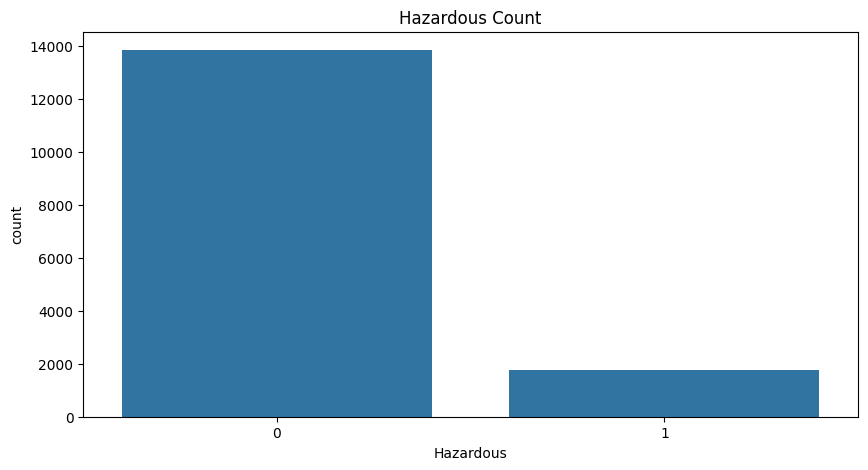

In [ ]:
plt.figure(figsize=(10,5))
plt.title('Hazardous Count')
sns.countplot(data=data, x ='Hazardous')

<Axes: title={'center': 'Classification Count colored by Hazardous'}, xlabel='Classification', ylabel='count'>

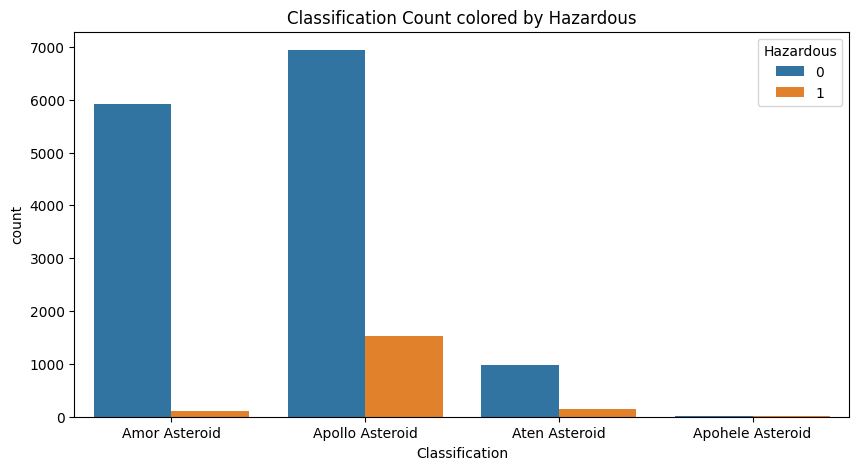

In [ ]:
plt.figure(figsize=(10,5))
plt.title('Classification Count colored by Hazardous')
sns.countplot(data=data, x='Classification', hue='Hazardous')

![Asteroid Classification](https://www.sott.net/image/s12/249216/full/orbits.jpg)

In [ ]:
data['Classification'] = [0 if value == 'Amor Asteroid'
                        else 1 if value == 'Apollo Asteroid'
                        else 2 if value == 'Aten Asteroid'
                        else 3
                        for value in data['Classification']]

In [ ]:
data.sample(10)

,Object Name,Epoch (TDB),Orbit Axis (AU),Orbit Eccentricity,Orbit Inclination (deg),Perihelion Argument (deg),Node Longitude (deg),Mean Anomoly (deg),Perihelion Distance (AU),Aphelion Distance (AU),Orbital Period (yr),Minimum Orbit Intersection Distance (AU),Orbital Reference,Asteroid Magnitude,Classification,Hazardous
3273,(2002 XO1),57800,2.8076,0.5757,6.4914,323.6543,77.2214,12.9705,1.1913,4.42,4.70,0.2126,12,20.7,0,0
6861,(2009 YU6),57800,2.4509,0.6311,12.1679,295.0542,91.6904,327.4553,0.9041,4.00,3.84,0.0798,8,21.4,1,0
1275,327140 (2005 EE224),57800,1.7447,0.3735,21.8258,208.2541,19.9821,33.7667,1.0930,2.40,2.30,0.1194,21,19.9,0,0
2508,(1998 MW5),57800,1.0233,0.3627,6.2964,26.6235,80.4048,150.5771,0.6521,1.39,1.04,0.0764,12,19.1,1,0
5854,(2008 PV16),54693,1.8686,0.5918,33.9352,260.1613,146.2495,337.0828,0.7628,2.97,2.55,0.0659,13,21.3,1,0
11293,(2014 OA339),57800,1.3077,0.3689,1.8705,315.1691,78.7624,206.3009,0.8253,1.79,1.50,0.0116,5,24.4,1,0
5359,(2007 VM84),54413,1.3014,0.1917,24.7322,7.5606,44.6651,356.7817,1.0520,1.55,1.48,0.0624,7,23.3,0,0
12029,(2015 BE4),57800,1.7277,0.4945,6.6617,308.1900,112.5436,349.5006,0.8733,2.58,2.27,0.0060,13,23.7,1,0
14259,(2016 HE19),57800,1.2395,0.1342,7.3344,166.4157,47.9933,212.3814,1.0732,1.41,1.38,0.0671,7,26.3,0,0
9302,(2012 VA5),57800,2.5985,0.6119,6.0631,36.7071,32.1349,0.6940,1.0084,4.19,4.19,0.0514,21,21.9,1,0


In [ ]:
data_new = data.drop(columns='Object Name')

In [ ]:
X = data_new.drop(columns='Hazardous')
y = data_new['Hazardous']

In [ ]:
X.info()

<class 'pandas.core.frame.DataFrame'>
Index: 15634 entries, 0 to 15634
Data columns (total 14 columns):
 #   Column                                    Non-Null Count  Dtype  
---  ------                                    --------------  -----  
 0   Epoch (TDB)                               15634 non-null  int64  
 1   Orbit Axis (AU)                           15634 non-null  float64
 2   Orbit Eccentricity                        15634 non-null  float64
 3   Orbit Inclination (deg)                   15634 non-null  float64
 4   Perihelion Argument (deg)                 15634 non-null  float64
 5   Node Longitude (deg)                      15634 non-null  float64
 6   Mean Anomoly (deg)                        15634 non-null  float64
 7   Perihelion Distance (AU)                  15634 non-null  float64
 8   Aphelion Distance (AU)                    15634 non-null  float64
 9   Orbital Period (yr)                       15634 non-null  float64
 10  Minimum Orbit Intersection Distance (AU

In [ ]:
X.describe()

,Epoch (TDB),Orbit Axis (AU),Orbit Eccentricity,Orbit Inclination (deg),Perihelion Argument (deg),Node Longitude (deg),Mean Anomoly (deg),Perihelion Distance (AU),Aphelion Distance (AU),Orbital Period (yr),Minimum Orbit Intersection Distance (AU),Orbital Reference,Asteroid Magnitude,Classification
count,15634.000000,15634.000000,15634.000000,15634.000000,15634.000000,15634.000000,15634.000000,15634.000000,15634.000000,15634.000000,15634.000000,15634.000000,15634.000000,15634.000000
mean,57365.532749,1.781012,0.449703,12.939206,181.499448,172.680946,172.838928,0.914899,2.647120,2.473433,0.101881,21.886210,22.286336,0.690290
std,1167.148181,0.603247,0.176002,11.300910,103.858105,103.381604,116.125667,0.240310,1.142688,1.517633,0.105940,33.632956,3.016002,0.605017
min,44221.000000,0.547600,0.004400,0.014700,0.008100,0.007000,0.003100,0.070700,0.800000,0.410000,0.000000,1.000000,9.450000,0.000000
25%,57800.000000,1.323600,0.322725,4.762175,92.432975,82.248100,62.030375,0.776725,1.740000,1.520000,0.018700,6.000000,19.900000,0.000000
50%,57800.000000,1.735500,0.462950,9.196350,183.300400,172.180350,167.750600,0.965800,2.520000,2.290000,0.062000,11.000000,22.200000,1.000000
75%,57800.000000,2.208675,0.572900,18.508175,270.908350,253.664375,281.445200,1.080300,3.420000,3.280000,0.159175,23.000000,24.600000,1.000000
max,57800.000000,21.395400,0.969500,154.375100,359.994200,359.998100,359.998200,1.300000,41.540000,98.970000,0.706900,635.000000,33.200000,3.000000


<h2> Data Splitting and Processing

In [ ]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler

<h3><u> Scaling data

In [ ]:
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)
X_scaled = pd.DataFrame(X_scaled, columns=X.columns)

<h3><u> Splitting data for training and testing


In [ ]:
X_train,X_test, y_train , y_test = train_test_split(X_scaled,y, test_size=0.3,random_state=10)

In [ ]:
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier

<h2> Model Training and Evaluation

<h3><u> Logistic Regression

In [ ]:
model1 = LogisticRegression(max_iter=1000)
model1.fit(X_train,y_train)
y_pred1 = model1.predict(X_test)
model1_accuracy = model1.score(X_test,y_test)
print(model1_accuracy)

0.9552334257088041


<h3><u> Decision Tree Classifier

In [ ]:
model2 = DecisionTreeClassifier(random_state=0)
model2.fit(X_train,y_train)
y_pred2 = model2.predict(X_test)
model2_accuracy = model2.score(X_test,y_test)
print(model2_accuracy)

1.0


<Axes: title={'center': 'Feature Importances'}>

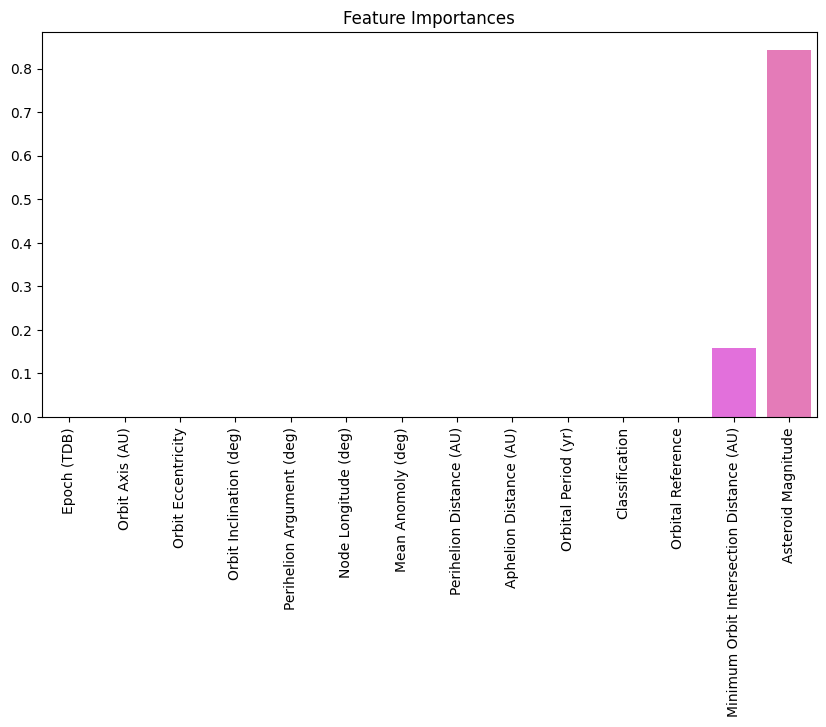

In [ ]:
feat_importances = model2.feature_importances_
feat_importances = pd.DataFrame(feat_importances, index=X.columns.values)
plt.figure(figsize=(10,5))
plt.title('Feature Importances')
plt.xticks(rotation=90)
sns.barplot(data=feat_importances.sort_values(0).T)

In [ ]:
import dtreeviz
feature_list = X_train.columns
viz = dtreeviz.model(
    model2,X_train,y_train,target_name='Hazardous', feature_names= feature_list, class_names=['Non-Hazardous','Hazardous']
)


c:\Users\aryan\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but DecisionTreeClassifier was fitted with feature names


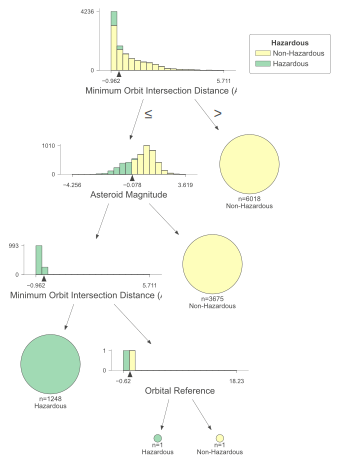

In [ ]:
viz.view()

<h3><u> Random Forest Classifier

In [ ]:
model3 = RandomForestClassifier(random_state=0)
model3.fit(X_train,y_train)
y_pred3 = model3.predict(X_test)
model3_accuracy = model3.score(X_test,y_test)
print(model3_accuracy)

1.0


<Axes: title={'center': 'Feature Importances'}>

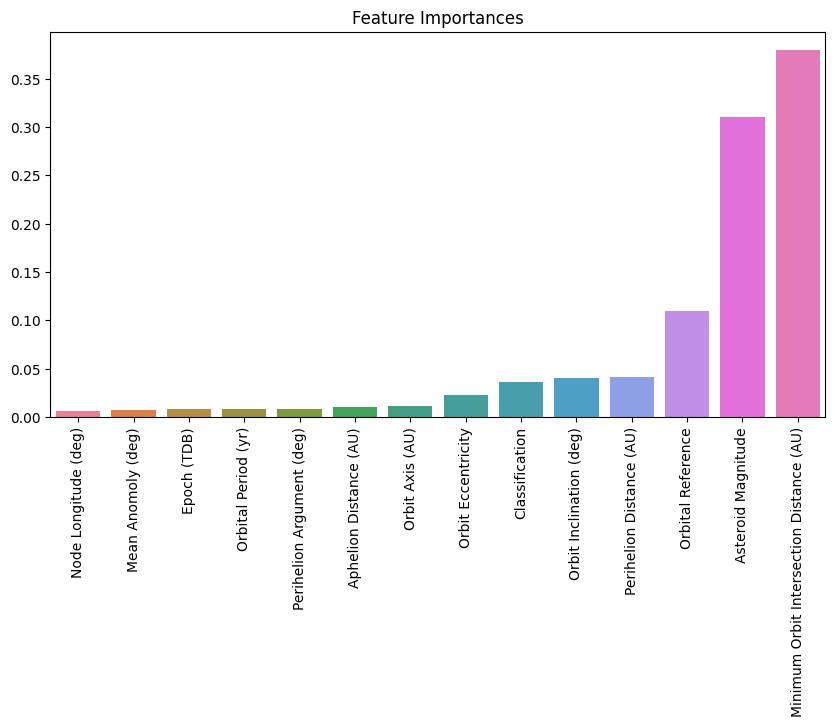

In [ ]:
feat_importances = model3.feature_importances_
feat_importances = pd.DataFrame(feat_importances, index=X.columns.values)
plt.figure(figsize=(10,5))
plt.title('Feature Importances')
plt.xticks(rotation=90)
sns.barplot(data=feat_importances.sort_values(0).T)